## This program uses three moving average crossover strategy to long and sort NIFTY50 

# Import the libraries

In [1]:
# For Data Manipulation 
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# To ignore warnings 
import warnings
warnings.filterwarnings("ignore")
import datetime

# Read Nifty50, 5min data

N50 csv file contains nifty50 index 5 min OHLC data The closing price of the stocks are stored in the csv file. read_csv method of pandas can be used the read csv files.

Syntax:

import pandas as pd pd.read_csv(filename,index_col)

    1.filename: name of the file in the string format
    2.index_col: column(s) to use as the row labels of the dataframe, either given as string name or column index

In [2]:
# The data is stored in the NIFTY file
# Df = pd.read_csv('NIFTY.csv',).drop(columns=["Instrument"],par)

# Df.Date=pd.to_datetime(Df.Date).apply(lambda x:datetime.datetime.strftime(x, '%Y-%m-%d'))
# Df=Df.set_index("Date")

In [3]:
# The data is stored in the NIFTY file
Df=pd.read_csv('NIFTY.csv',index_col=1,parse_dates=["Date"]).iloc[:,1:]

# Convert index to datetime format
Df.index = pd.to_datetime(Df.index)

In [4]:
Df

,Time,Open,High,Low,Close
Date,,,,,
2008-01-01,09:55,6138.60,6154.60,6138.60,6148.90
2008-01-01,09:56,6149.75,6149.75,6132.80,6132.80
2008-01-01,09:57,6138.25,6138.25,6127.95,6127.95
2008-01-01,09:58,6127.15,6127.15,6120.90,6120.90
2008-01-01,09:59,6118.05,6118.05,6113.55,6113.90
...,...,...,...,...,...
2020-11-27,15:28,12947.00,12947.00,12927.95,12927.95
2020-11-27,15:29,12928.35,12947.90,12928.35,12937.70
2020-11-27,15:30,12936.40,12948.60,12933.85,12942.85


# Visualize the closing price

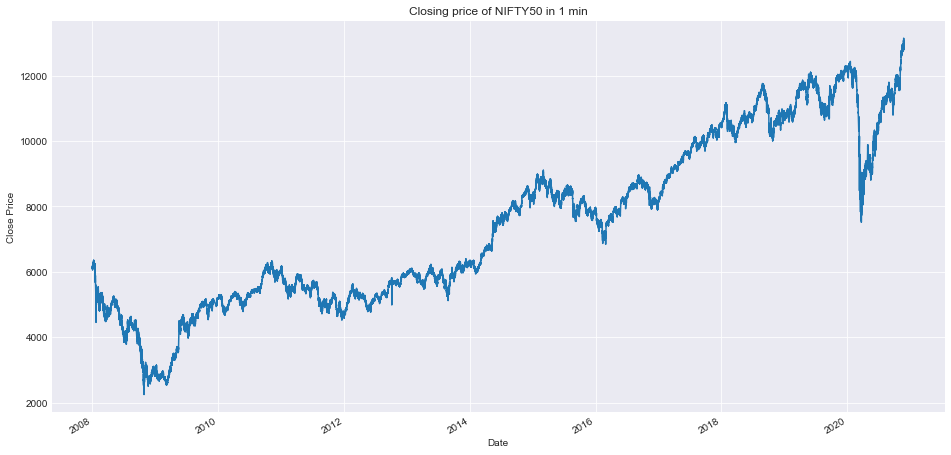

In [5]:
plt.figure(figsize=(16, 8))


Df['Close'].plot()
plt.ylabel('Close Price',fontsize=10)
plt.xlabel("Date",fontsize=10)
plt.title("Closing price of NIFTY50 in 1 min")
    
plt.show()

# Reading same data and convert it into 5 min Time Frame

In [6]:
df=pd.read_csv('NIFTY.csv',parse_dates=["Date"]).iloc[:,1:]
df.index=pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])

In [7]:
df

,Date,Time,Open,High,Low,Close
2008-01-01 09:55:00,2008-01-01,09:55,6138.60,6154.60,6138.60,6148.90
2008-01-01 09:56:00,2008-01-01,09:56,6149.75,6149.75,6132.80,6132.80
2008-01-01 09:57:00,2008-01-01,09:57,6138.25,6138.25,6127.95,6127.95
2008-01-01 09:58:00,2008-01-01,09:58,6127.15,6127.15,6120.90,6120.90
2008-01-01 09:59:00,2008-01-01,09:59,6118.05,6118.05,6113.55,6113.90
...,...,...,...,...,...,...
2020-11-27 15:28:00,2020-11-27,15:28,12947.00,12947.00,12927.95,12927.95
2020-11-27 15:29:00,2020-11-27,15:29,12928.35,12947.90,12928.35,12937.70
2020-11-27 15:30:00,2020-11-27,15:30,12936.40,12948.60,12933.85,12942.85
2020-11-27 15:31:00,2020-11-27,15:31,12941.95,12941.95,12941.95,12941.95


# Resampling data for 5 min freq

In [8]:
df=df.resample("5min").agg({"Date":'first',
                           'Time':'first',
                            'Open':'first',
                           'High':'max',
                            'Low':'min',
                           'Close':'last'
                            }).dropna()         
df

,Date,Time,Open,High,Low,Close
2008-01-01 09:55:00,2008-01-01,09:55,6138.60,6154.60,6113.55,6113.90
2008-01-01 10:00:00,2008-01-01,10:00,6114.05,6126.65,6111.35,6111.35
2008-01-01 10:05:00,2008-01-01,10:05,6110.50,6130.65,6110.50,6128.90
2008-01-01 10:10:00,2008-01-01,10:10,6128.70,6130.15,6123.15,6123.55
2008-01-01 10:15:00,2008-01-01,10:15,6124.85,6131.90,6123.45,6131.55
...,...,...,...,...,...,...
2020-11-27 15:10:00,2020-11-27,15:10,12971.70,12981.00,12969.35,12980.80
2020-11-27 15:15:00,2020-11-27,15:15,12980.55,12983.35,12967.05,12968.25
2020-11-27 15:20:00,2020-11-27,15:20,12967.95,12981.90,12967.80,12975.65
2020-11-27 15:25:00,2020-11-27,15:25,12975.40,12975.45,12927.95,12937.70


In [9]:
df=df.reset_index()

In [10]:
df

,index,Date,Time,Open,High,Low,Close
0,2008-01-01 09:55:00,2008-01-01,09:55,6138.60,6154.60,6113.55,6113.90
1,2008-01-01 10:00:00,2008-01-01,10:00,6114.05,6126.65,6111.35,6111.35
2,2008-01-01 10:05:00,2008-01-01,10:05,6110.50,6130.65,6110.50,6128.90
3,2008-01-01 10:10:00,2008-01-01,10:10,6128.70,6130.15,6123.15,6123.55
4,2008-01-01 10:15:00,2008-01-01,10:15,6124.85,6131.90,6123.45,6131.55
...,...,...,...,...,...,...,...
238269,2020-11-27 15:10:00,2020-11-27,15:10,12971.70,12981.00,12969.35,12980.80
238270,2020-11-27 15:15:00,2020-11-27,15:15,12980.55,12983.35,12967.05,12968.25
238271,2020-11-27 15:20:00,2020-11-27,15:20,12967.95,12981.90,12967.80,12975.65
238272,2020-11-27 15:25:00,2020-11-27,15:25,12975.40,12975.45,12927.95,12937.70


In [11]:
df=df.set_index("Date")

In [12]:
df

,index,Time,Open,High,Low,Close
Date,,,,,,
2008-01-01,2008-01-01 09:55:00,09:55,6138.60,6154.60,6113.55,6113.90
2008-01-01,2008-01-01 10:00:00,10:00,6114.05,6126.65,6111.35,6111.35
2008-01-01,2008-01-01 10:05:00,10:05,6110.50,6130.65,6110.50,6128.90
2008-01-01,2008-01-01 10:10:00,10:10,6128.70,6130.15,6123.15,6123.55
2008-01-01,2008-01-01 10:15:00,10:15,6124.85,6131.90,6123.45,6131.55
...,...,...,...,...,...,...
2020-11-27,2020-11-27 15:10:00,15:10,12971.70,12981.00,12969.35,12980.80
2020-11-27,2020-11-27 15:15:00,15:15,12980.55,12983.35,12967.05,12968.25
2020-11-27,2020-11-27 15:20:00,15:20,12967.95,12981.90,12967.80,12975.65


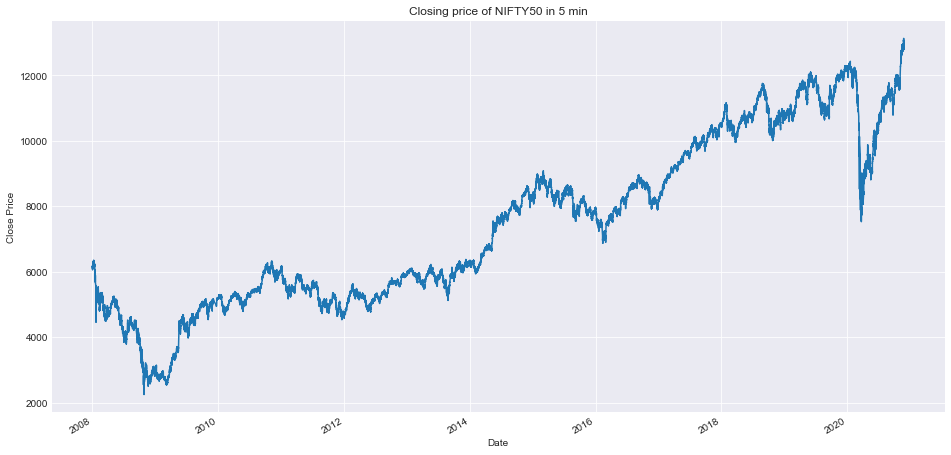

In [13]:
plt.figure(figsize=(16, 8))


df['Close'].plot()
plt.ylabel('Close Price',fontsize=10)
plt.xlabel("Date",fontsize=10)
plt.title("Closing price of NIFTY50 in 5 min")
    
plt.show()

In [14]:
df.head()

,index,Time,Open,High,Low,Close
Date,,,,,,
2008-01-01,2008-01-01 09:55:00,09:55,6138.60,6154.60,6113.55,6113.90
2008-01-01,2008-01-01 10:00:00,10:00,6114.05,6126.65,6111.35,6111.35
2008-01-01,2008-01-01 10:05:00,10:05,6110.50,6130.65,6110.50,6128.90
2008-01-01,2008-01-01 10:10:00,10:10,6128.70,6130.15,6123.15,6123.55
2008-01-01,2008-01-01 10:15:00,10:15,6124.85,6131.90,6123.45,6131.55


In [15]:
def getMA(df, maperiod ,ema):
    
    if ema == True:
        # Use exponential moving average
        ma = df['Close'].ewm(com = maperiod - 1, adjust=True, min_periods = maperiod).mean()
        
    else:
        # Use simple moving average
        ma = df['Close'].rolling(window = maperiod).mean()
        
    return ma


In [16]:

df['MA_Slow']=getMA(df,13,1)
df['MA_Mid']=getMA(df,8,1)
df['MA_Fast']=getMA(df,5,1)

In [17]:
df.head(25)

,index,Time,Open,High,Low,Close,MA_Slow,MA_Mid,MA_Fast
Date,,,,,,,,,
2008-01-01,2008-01-01 09:55:00,09:55,6138.60,6154.60,6113.55,6113.90,NaN,NaN,NaN
2008-01-01,2008-01-01 10:00:00,10:00,6114.05,6126.65,6111.35,6111.35,NaN,NaN,NaN
2008-01-01,2008-01-01 10:05:00,10:05,6110.50,6130.65,6110.50,6128.90,NaN,NaN,NaN
2008-01-01,2008-01-01 10:10:00,10:10,6128.70,6130.15,6123.15,6123.55,NaN,NaN,NaN
2008-01-01,2008-01-01 10:15:00,10:15,6124.85,6131.90,6123.45,6131.55,NaN,NaN,6123.914398
2008-01-01,2008-01-01 10:20:00,10:20,6132.20,6134.45,6128.70,6131.20,NaN,NaN,6125.889201
2008-01-01,2008-01-01 10:25:00,10:25,6132.25,6134.85,6132.25,6134.45,NaN,NaN,6128.055711
2008-01-01,2008-01-01 10:30:00,10:30,6134.85,6136.85,6133.25,6133.55,NaN,6128.164846,6129.376092
2008-01-01,2008-01-01 10:35:00,10:35,6133.00,6133.35,6126.60,6129.20,NaN,6128.349869,6129.335414


In [18]:
df=df.dropna()
df

,index,Time,Open,High,Low,Close,MA_Slow,MA_Mid,MA_Fast
Date,,,,,,,,,
2008-01-01,2008-01-01 10:55:00,10:55,6137.95,6141.00,6135.30,6135.30,6131.729640,6132.851730,6134.313287
2008-01-01,2008-01-01 11:00:00,11:00,6136.15,6136.40,6128.90,6132.25,6131.789036,6132.762800,6133.881646
2008-01-01,2008-01-01 11:05:00,11:05,6132.70,6137.10,6132.70,6137.10,6132.373494,6133.389515,6134.548790
2008-01-01,2008-01-01 11:10:00,11:10,6137.70,6139.75,6136.85,6138.00,6132.972825,6134.042978,6135.259023
2008-01-01,2008-01-01 11:15:00,11:15,6137.00,6138.55,6134.95,6138.50,6133.544651,6134.664293,6135.922151
...,...,...,...,...,...,...,...,...,...
2020-11-27,2020-11-27 15:10:00,15:10,12971.70,12981.00,12969.35,12980.80,12974.815606,12972.032326,12970.743816
2020-11-27,2020-11-27 15:15:00,15:15,12980.55,12983.35,12967.05,12968.25,12974.310560,12971.559535,12970.245053
2020-11-27,2020-11-27 15:20:00,15:20,12967.95,12981.90,12967.80,12975.65,12974.413593,12972.070843,12971.326042


# Visualise price with all three moving averages


Because we have very close moving average with MA_Periods 5,8,13 that's why they all are seems to be collapse on chart

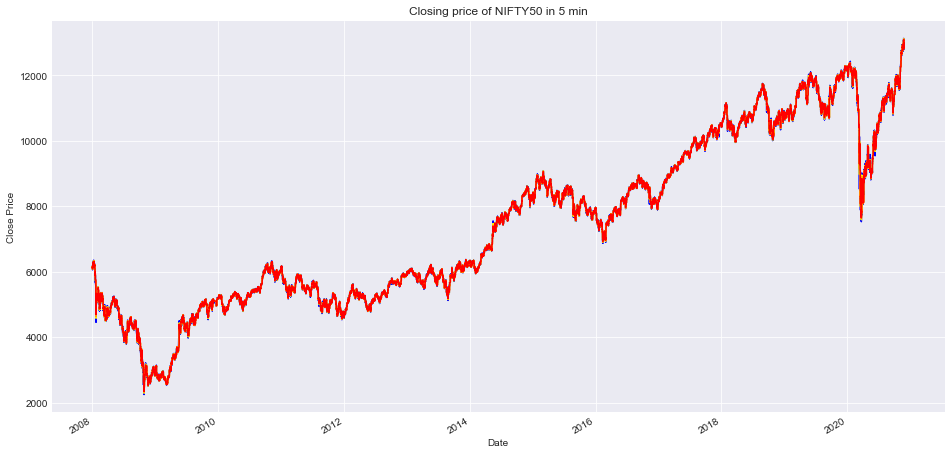

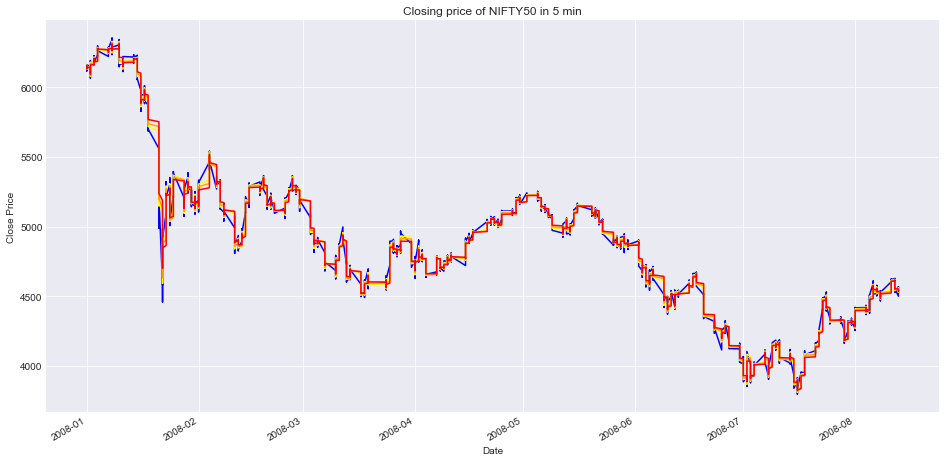

In [19]:
plt.figure(figsize=(16, 8))

df['Close'].plot(label='Close Price',color='blue')
df['MA_Fast'].plot(label='Fast MA',color='yellow')
df['MA_Mid'].plot(label='Mid MA',color='orange')
df['MA_Slow'].plot(label='Slow MA',color='red')
plt.ylabel('Close Price',fontsize=10)
plt.xlabel("Date",fontsize=10)
plt.title("Closing price of NIFTY50 in 5 min")
    
plt.show()

plt.figure(figsize=(16, 8))
df['Close'].iloc[:10000].plot(label='Close Price',color='blue')
df['MA_Fast'].iloc[:10000].plot(label='Fast MA',color='yellow')
df['MA_Mid'].iloc[:10000].plot(label='Mid MA',color='orange')
df['MA_Slow'].iloc[:10000].plot(label='Slow MA',color='red')
plt.ylabel('Close Price',fontsize=10)
plt.xlabel("Date",fontsize=10)
plt.title("Closing price of NIFTY50 in 5 min")
    
plt.show()

# Logic Function to create Buy and Sell position

In [20]:
# creating function for Buy and Sell

def Buy_Sell_fun(data):
    Buy_list=[]
    Sell_list=[]
    longFlag=False
    shortFlag=False
    
    for i in range(0,len(data)):
        #Sort Condition
        if data['MA_Mid'][i]<data['MA_Slow'][i] and data['MA_Fast'][i]<data['MA_Mid'][i] and longFlag== False and shortFlag==False:
            Buy_list.append(data['Close'][i])
            Sell_list.append(np.nan)
            shortFlag=True
    
        elif data['MA_Fast'][i]>data['MA_Mid'][i] and shortFlag== True:
            Sell_list.append(data['Open'][i])
            Buy_list.append(np.nan)
            shortFlag=False
        
        
        
        #Long Condition
        elif data['MA_Mid'][i]>data['MA_Slow'][i] and data['MA_Fast'][i]>data['MA_Mid'][i] and longFlag== False and shortFlag==False:
            Buy_list.append(data['Close'][i])
            Sell_list.append(np.nan)
            longFlag=True
    
        elif data['MA_Fast'][i]<data['MA_Mid'][i] and longFlag== True:
            Sell_list.append(data['Open'][i])
            Buy_list.append(np.nan)
            longFlag=False
        else:
            Buy_list.append(np.nan)
            Sell_list.append(np.nan)
    
    return (Buy_list,Sell_list)



Calling Function to Buy and Sell

In [21]:
df['Buy']=Buy_Sell_fun(df)[0]
df['Sell']=Buy_Sell_fun(df)[1]


In [22]:
a=Buy_Sell_fun(df)

In [23]:
df.head(50)


,index,Time,Open,High,Low,Close,MA_Slow,MA_Mid,MA_Fast,Buy,Sell
Date,,,,,,,,,,,
2008-01-01,2008-01-01 10:55:00,10:55,6137.95,6141.00,6135.30,6135.30,6131.729640,6132.851730,6134.313287,6135.30,NaN
2008-01-01,2008-01-01 11:00:00,11:00,6136.15,6136.40,6128.90,6132.25,6131.789036,6132.762800,6133.881646,NaN,NaN
2008-01-01,2008-01-01 11:05:00,11:05,6132.70,6137.10,6132.70,6137.10,6132.373494,6133.389515,6134.548790,NaN,NaN
2008-01-01,2008-01-01 11:10:00,11:10,6137.70,6139.75,6136.85,6138.00,6132.972825,6134.042978,6135.259023,NaN,NaN
2008-01-01,2008-01-01 11:15:00,11:15,6137.00,6138.55,6134.95,6138.50,6133.544651,6134.664293,6135.922151,NaN,NaN
2008-01-01,2008-01-01 11:20:00,11:20,6138.60,6140.40,6136.80,6136.80,6133.872735,6134.957787,6136.100941,NaN,NaN
2008-01-01,2008-01-01 11:25:00,11:25,6136.70,6136.70,6132.15,6134.45,6133.929558,6134.888862,6135.765925,NaN,NaN
2008-01-01,2008-01-01 11:30:00,11:30,6135.15,6135.55,6131.50,6132.00,6133.743622,6134.500904,6135.003955,NaN,NaN
2008-01-01,2008-01-01 11:35:00,11:35,6132.70,6138.50,6132.30,6136.85,6134.037250,6134.813469,6135.376601,NaN,NaN


# Visualise the trades on charts 

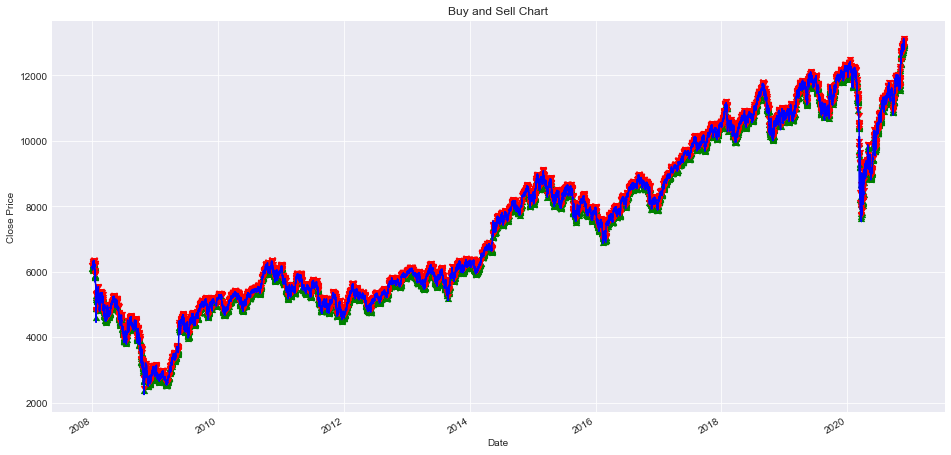

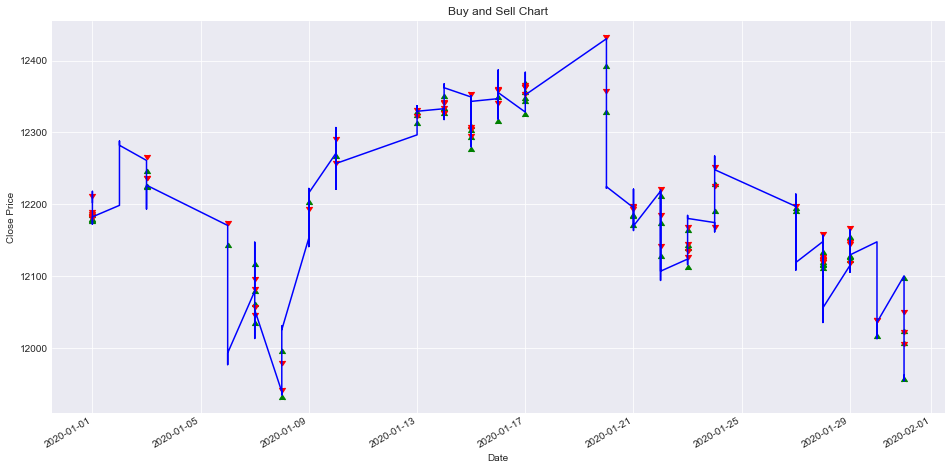

In [24]:
plt.figure(figsize=(16, 8))


df['Close'].plot(label='Close Price',color='blue')
#df['MA_Fast'].plot(label='Fast MA',color='yellow')
#df['MA_Mid'].plot(label='Mid MA',color='orange')
#df['MA_Slow'].plot(label='Slow MA',color='pink')
plt.scatter(df.index,df['Buy'],color='green',marker=6)
plt.scatter(df.index,df['Sell'],color='red',marker=7)
plt.ylabel('Close Price',fontsize=10)
plt.xlabel("Date",fontsize=10)
plt.title("Buy and Sell Chart")
    
plt.show()


plt.figure(figsize=(16, 8))


df['Close'].loc['2020-01'].plot(label='Close Price',color='blue')
#df['MA_Fast'].plot(label='Fast MA',color='yellow')
#df['MA_Mid'].plot(label='Mid MA',color='orange')
#df['MA_Slow'].plot(label='Slow MA',color='pink')
plt.scatter(df.loc['2020-01'].index,df['Buy'].loc['2020-01'],color='green',marker=6)
plt.scatter(df.loc['2020-01'].index,df['Sell'].loc['2020-01'],color='red',marker=7)
plt.ylabel('Close Price',fontsize=10)
plt.xlabel("Date",fontsize=10)
plt.title("Buy and Sell Chart")
    
plt.show()

# Defining for entry signal

In [25]:
buy=None
#Entry list will tell whether trade is active or not at any given time 

Entry=[]

for index,item in df.iterrows():
    
    if not np.isnan(item.Buy):
        buy=1
        Entry.append(True)
        
    elif np.isnan(item.Sell) and buy:
        Entry.append(True)
    
    elif not np.isnan(item.Sell) and buy:
        buy=None
        Entry.append(True)
    
    else:
        Entry.append(False)
    
        

In [26]:
df['Entry_Signal']=Entry

In [27]:
df

,index,Time,Open,High,Low,Close,MA_Slow,MA_Mid,MA_Fast,Buy,Sell,Entry_Signal
Date,,,,,,,,,,,,
2008-01-01,2008-01-01 10:55:00,10:55,6137.95,6141.00,6135.30,6135.30,6131.729640,6132.851730,6134.313287,6135.3,NaN,True
2008-01-01,2008-01-01 11:00:00,11:00,6136.15,6136.40,6128.90,6132.25,6131.789036,6132.762800,6133.881646,NaN,NaN,True
2008-01-01,2008-01-01 11:05:00,11:05,6132.70,6137.10,6132.70,6137.10,6132.373494,6133.389515,6134.548790,NaN,NaN,True
2008-01-01,2008-01-01 11:10:00,11:10,6137.70,6139.75,6136.85,6138.00,6132.972825,6134.042978,6135.259023,NaN,NaN,True
2008-01-01,2008-01-01 11:15:00,11:15,6137.00,6138.55,6134.95,6138.50,6133.544651,6134.664293,6135.922151,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-27,2020-11-27 15:10:00,15:10,12971.70,12981.00,12969.35,12980.80,12974.815606,12972.032326,12970.743816,NaN,NaN,True
2020-11-27,2020-11-27 15:15:00,15:15,12980.55,12983.35,12967.05,12968.25,12974.310560,12971.559535,12970.245053,NaN,NaN,True
2020-11-27,2020-11-27 15:20:00,15:20,12967.95,12981.90,12967.80,12975.65,12974.413593,12972.070843,12971.326042,NaN,NaN,True


# Define the explanatory variables

In [28]:

buy=None
#stores return for each trade
ret_arr=[]
#stores pick afer each trade
peak=[]
no_of_trades=0
no_of_Profitable_trades=0
prev_peak=float("-inf")

for index,item in df.iterrows():
    if not np.isnan(item.Sell) and buy:
        no_of_trades+=1
        
        if item.Sell>buy:
            no_of_Profitable_trades+=1
            
        curr_ret=(item.Sell-buy)/buy
        ret_arr.append(curr_ret)
        prev_peak=max(prev_peak,curr_ret)
        
        # print(buy,item.Sell)
        buy=None
        
    elif not np.isnan(item.Buy) and not buy:
        buy=item.Buy
        ret_arr.append(0)
    else:
        ret_arr.append(0)
    peak.append(prev_peak)
    
        

In [29]:
ret_arr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.002925692305184721,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0022892243521332447,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.009759218614595904,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.001814539304070838,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.014213164759856336,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0024656227516349906,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0018417247590813404,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [30]:
print("No of Trades: ",no_of_trades)
print("No of Profitable Trades: ",no_of_Profitable_trades)
Accuracy=round(no_of_Profitable_trades/no_of_trades,2)

print("Accuracy of Strategy: ",Accuracy)

No of Trades:  9338
No of Profitable Trades:  4724
Accuracy of Strategy:  0.51


Accuracy is almost 50 percent which is good for any of the system, But on the basis of Accuracy you can't say that you agined nothing in these all years. That is why we are Proceeding to check actual strategy gain.

In [31]:
np.array(ret_arr).cumsum()[-1]


1.3638907412513046

In [32]:
df['Strategy_ret']=ret_arr
df['peak']=peak

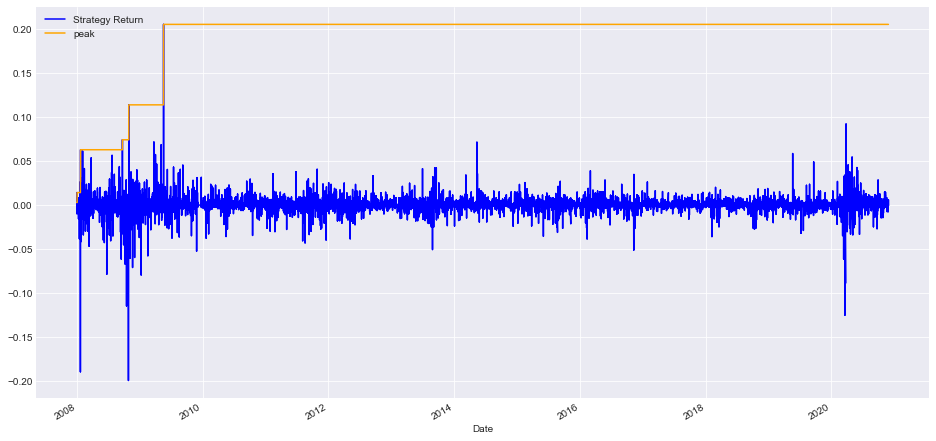

In [33]:
plt.figure(figsize=(16, 8))
df['Strategy_ret'].plot(label='Strategy Return',color='blue')
df['peak'].plot(label='peak',color='orange')
plt.legend()

Text(0.5, 1.0, 'Strategy Return')

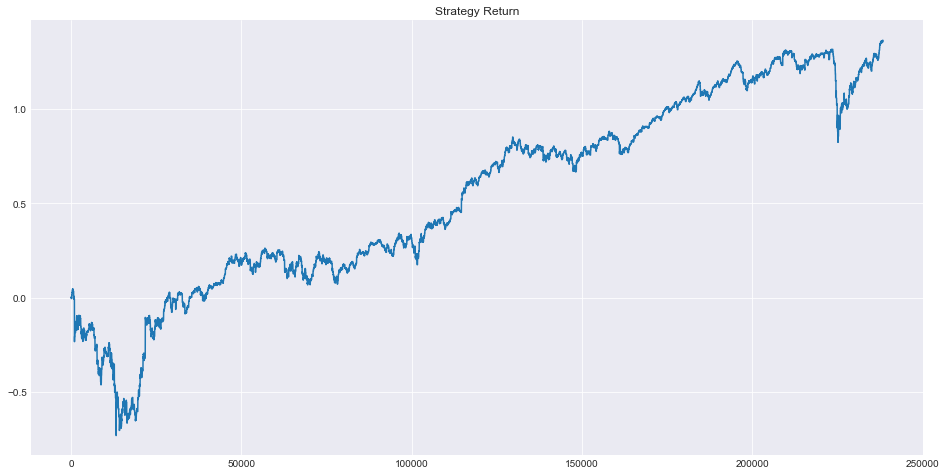

In [34]:
plt.figure(figsize=(16, 8))
plt.plot(np.array(ret_arr).cumsum())
plt.title("Strategy Return")
    

# plt.plot(np.array(peak))

# Buy and Hold Returns   v/s Strategy Returns

In [35]:
BuyNHold_returns=(df.Close[-1]/df.Close[0]-1)*100
print("Buy and Hold Returns: ",round(BuyNHold_returns,2))
print("Strategy Returns: ",round((df['Strategy_ret'].cumsum()[-1]*100),2))


Buy and Hold Returns:  111.38
Strategy Returns:  136.39


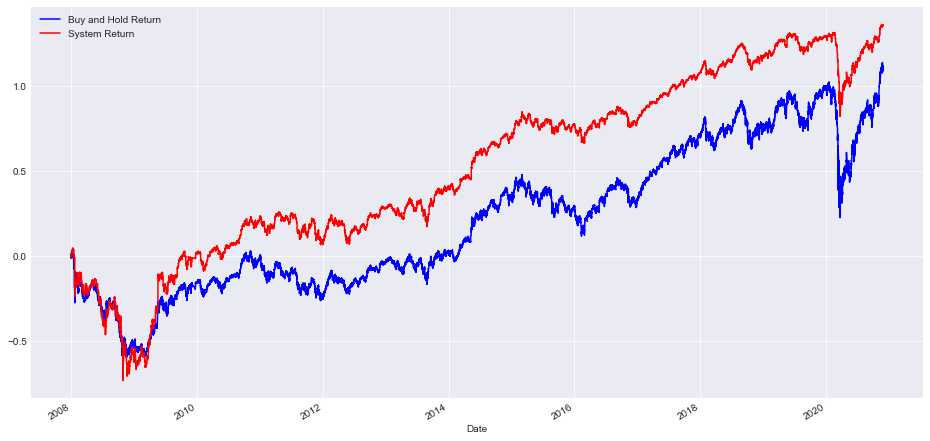

In [36]:
#plt.plot(df['ret'].cumsum(),df.Close)
plt.figure(figsize=(16, 8))
((df['Close']-df.Close[0])/df.Close[0]).plot(label='Buy and Hold Return',color='blue')

df['Strategy_ret'].cumsum().plot(label='System Return ',color='red')
plt.legend()

In [37]:
#df.to_excel("C:\\Users\\ASUS\\Downloads\\a.xlsx")

# Maximum Drawdown

## Buy and Hold Drawdown

In [38]:
df["Peak"]=df.Close.cummax()
df["Drawdown"]=df.Close-df.Peak
max_drawdown=round((((df.Drawdown/df.Peak).min())*100),2)
print ("maximum drawdown:",max_drawdown)

maximum drawdown: -64.52


### Ploting maximum drawdown of initial capital

<AxesSubplot:xlabel='Date'>

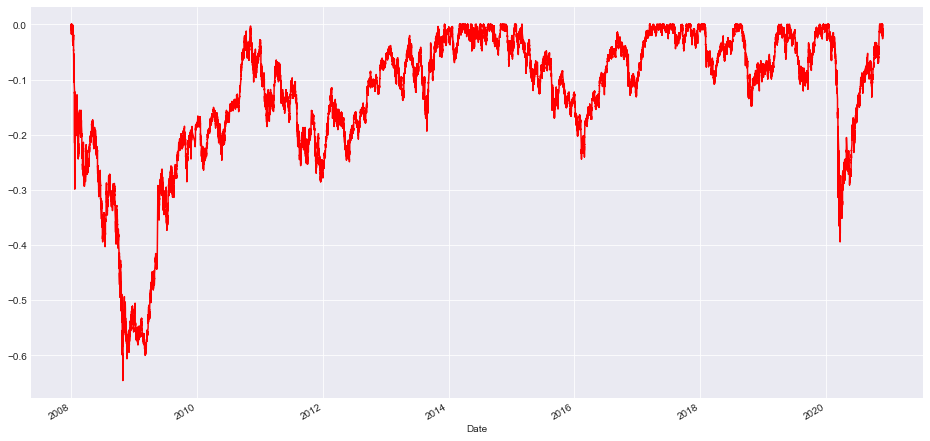

In [39]:
plt.figure(figsize=(16, 8))
(df.Drawdown/df.Peak).plot(color='red')


### Ploting drawdown

<AxesSubplot:xlabel='Date'>

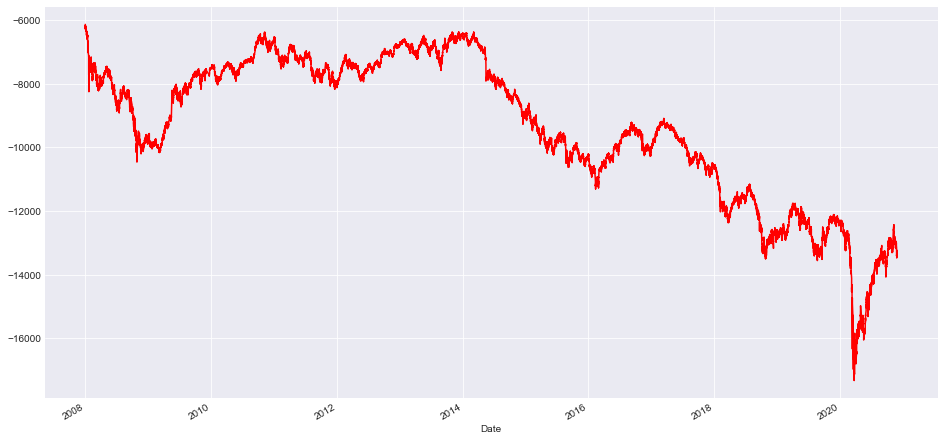

In [40]:
plt.figure(figsize=(16, 8))
(df.Drawdown-df.Peak).plot(color='red')


## Strategy Drawdown

In [41]:
df["Peak"]=df.Strategy_ret.cummax()
df["Drawdown"]=df.Strategy_ret-df.Peak
max_drawdown=round((((df.Drawdown/df.Peak).min())),2)
print ("maximum drawdown:",max_drawdown)

maximum drawdown: -14.31


### Ploting strategy drawdown of initial capital 

<AxesSubplot:xlabel='Date'>

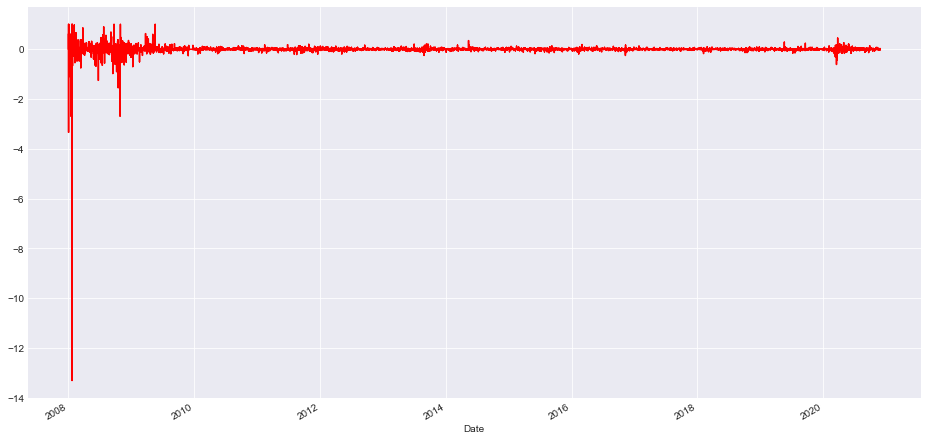

In [42]:
plt.figure(figsize=(16, 8))
(df.Strategy_ret/df.Peak).plot(color='red')

###  Ploting drawdown

<AxesSubplot:xlabel='Date'>

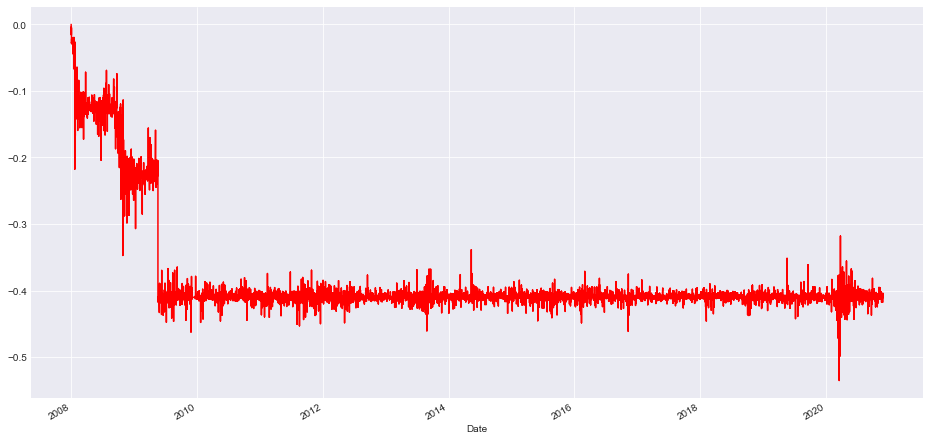

In [43]:
plt.figure(figsize=(16, 8))
(df.Drawdown-df.Peak).plot(color='red')


# Conclusion

We have seen that the Number of profitable trade and the number of non-profitable trades is nearly equal (i.e, No of Trades: 9338 No of Profitable Trades: 4724, Accuracy of Strategy: 0.51 ) but Strategy return is still more than Buy and hold return (Buy and Hold Returns: 111.38, Strategy Returns: 136.39). for further improvement of this strategy is either Change in Time frame or by changing moving averager's period.
1. EMA/SMA period from (Fast,mid,slow)=(5,8,13) to (Fast,mid,slow)=(5,9,14) then our matrices are going to be:
    
    No of Trades:  9648
    
    No of Profitable Trades: 4896
    
    Accuracy of Strategy: 0.51
    
    Returns:
   
        Buy and Hold Returns: 111.38
        Strategy Returns: 148.64
        
    Drawdown:
    
        Buy and Hold: -64.52
        Strategy: -13.44
        
2. Changing time frame from 5 to 10 then results are:

    No of Trades: 4624
    
    No of Profitable Trades: 2423
    
    Accuracy of Strategy: 0.52
    
    Returns:
   
        Buy and Hold Returns: 111.38
        Strategy Returns: 175.88
        
We can observe from above that when we changed the time frame from 5 min to 10 min and applied the same ema crossovers strategy then the returns goes up to 176 % from 136%.